In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 50
CHANNELS = 3
EPOCHS = 30

In [3]:
import os

List = os.listdir(".\\dataset\\valid")
number_files = 0
for p in List:
    number_files += len(os.listdir(".\\dataset\\valid\\" + p))
print(number_files)

17572


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    ".\\dataset\\valid",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 17572 files belonging to 38 classes.


In [5]:
class_names = dataset.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [6]:
train_dataset = dataset.take(300)
valid_dataset = dataset.skip(300)

test_dataset = valid_dataset.take(25)
valid_dataset = valid_dataset.skip(25)

In [7]:
len(test_dataset)

25

In [8]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(50, 256, 256, 3)
[ 4 17  4 11 34 31 21  1 19 14 17 29  3 28 32 15  1 13 21  7  6  3 14 31
  6 12 23 13 19  8  3  4 20 15  8 10  0 37  4  3  8  5 11 37 31 11 34  1
 26 24]


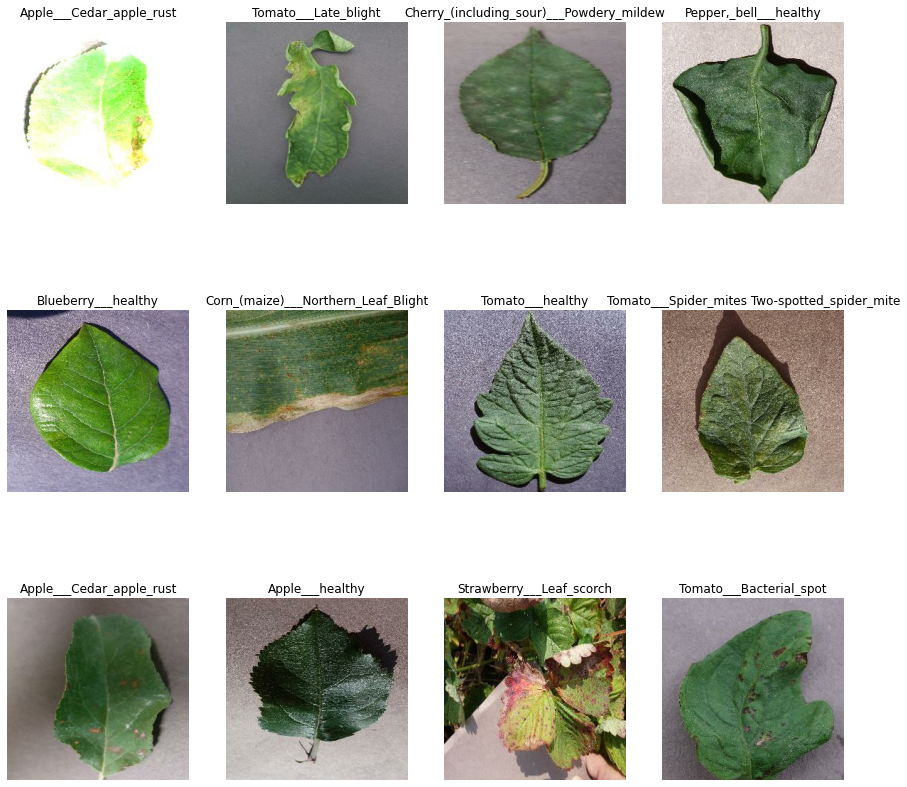

In [9]:
plt.figure(figsize = (15, 15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
train_dataset = train_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
n_classes = 38
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(50, kernel_size = (3, 3), activation = 'relu', input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

In [13]:
model.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (50, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (50, 254, 254, 50)        1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (50, 127, 127, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (50, 125, 125, 32)        14432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (50, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (50, 60, 60, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (50, 30, 30, 32)         

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [16]:
len(test_dataset)

25

In [ ]:
history = model.fit(
    train_dataset,
    epochs =  EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = valid_dataset
)

Epoch 1/30
300/300 [==============================] - 1035s 3s/step - loss: 3.1133 - accuracy: 0.1527 - val_loss: 2.3702 - val_accuracy: 0.3381
Epoch 2/30
300/300 [==============================] - 924s 3s/step - loss: 1.6919 - accuracy: 0.5007 - val_loss: 1.3667 - val_accuracy: 0.5915
Epoch 3/30
300/300 [==============================] - 871s 3s/step - loss: 1.0986 - accuracy: 0.6635 - val_loss: 1.0063 - val_accuracy: 0.6967
Epoch 4/30
300/300 [==============================] - 893s 3s/step - loss: 0.8529 - accuracy: 0.7365 - val_loss: 0.8388 - val_accuracy: 0.7405
Epoch 5/30
300/300 [==============================] - 983s 3s/step - loss: 0.6644 - accuracy: 0.7896 - val_loss: 0.7523 - val_accuracy: 0.7799
Epoch 6/30
300/300 [==============================] - 932s 3s/step - loss: 0.5723 - accuracy: 0.8242 - val_loss: 0.7556 - val_accuracy: 0.7890
Epoch 7/30
300/300 [==============================] - 981s 3s/step - loss: 0.4830 - accuracy: 0.8453 - val_loss: 0.7357 - val_accuracy: 0.781

In [ ]:
scores = model.evaluate(test_dataset)

In [ ]:
scores

In [ ]:
print(history.history.keys())

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("../models")]) + 1

model.save(f"../models/{model_version}")

In [ ]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    if(class_names[first_label] == class_names[np.argmax(batch_prediction[0])]):
        print("Right Prediction")

In [ ]:
#new_model = tf.keras.models.load_model('../models/2')

In [ ]:
#import numpy as np
#for images_batch, labels_batch in test_dataset.take(1):
#    first_image = (images_batch[0].numpy().astype('uint8'))
#    first_label = labels_batch[0]
#    print("first image to predict")
#    plt.imshow(first_image)
#    print("first image's actual label: ", class_names[first_label])
#    
#    batch_prediction = new_model.predict(images_batch)
#    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
#    if(class_names[first_label] == class_names[np.argmax(batch_prediction[0])]):
#        print("Right Prediction")